#**[시각화가 중요한 이유]**

In [63]:
#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [64]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

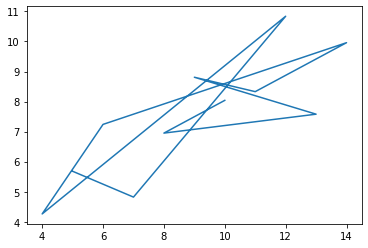

In [67]:
# 선 그래프
plt.plot(dataset_1['x'], dataset_1['y'])

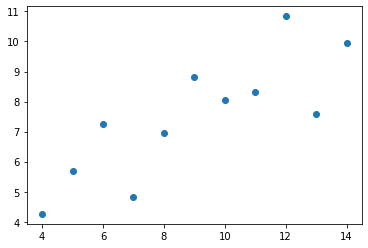

In [68]:
# 점 그래프
plt.plot(dataset_1['x'],dataset_1['y'], 'o')

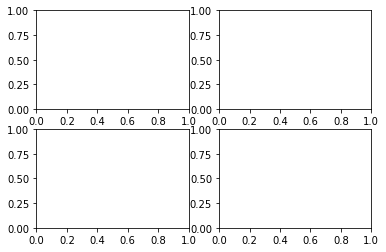

In [69]:
# 한 번에 4개 그래프 그리기

# 기본 틀
fig = plt.figure()
# 그래프 격자 그리기
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

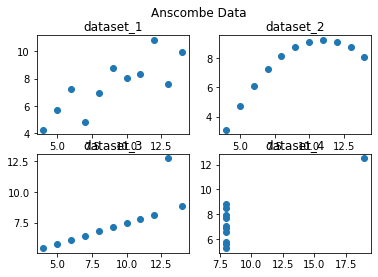

In [70]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig.suptitle("Anscombe Data")

fig

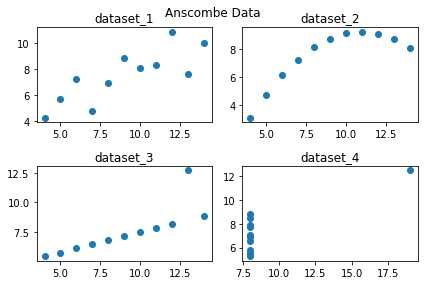

In [71]:
# 레이아웃 조절
fig.tight_layout()

fig

* 평균, 분산, 상관관계, 회귀선의 통계 수치가 같아도 이렇게 그래프의 형태가 다를 수 있음.
* 데이터 분석 시 수치에만 의존하면 잘못된 판단을 할 수 있다.

#**[matplotlib 라이브러리]**

In [72]:
# seaborn의 tips 데이터 집합
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Total Bill')

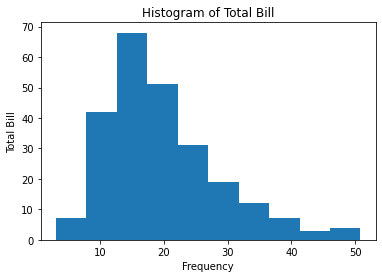

In [73]:
# 히스토그램 그리기
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

Text(0, 0.5, 'Tip')

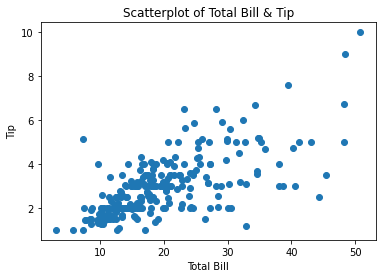

In [74]:
# 산점도 그리기
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill & Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

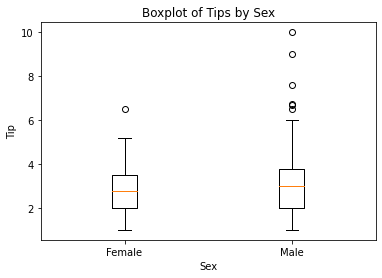

In [75]:
# box plot 그리기
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
              labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

In [76]:
# 다변량 그래프 그리기 - 산점도 그래프
# 앞에서 실습한 산점도 그래프에 성별을 새 변수로 추가.

# 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용 불가하므로 정수 만들기
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

In [77]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

* 성별로 색 구분, 테이블 당 인원 수로 점의 크기 표현.

Text(0, 0.5, 'Tip')

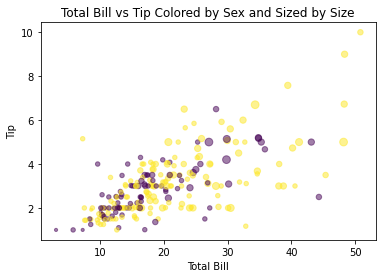

In [78]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha=0.5)    #투명도 조절
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# **[seaborn 라이브러리]**

### **<단변량 그래프>**

In [79]:
import seaborn as sns

tips = sns.load_dataset("tips")

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

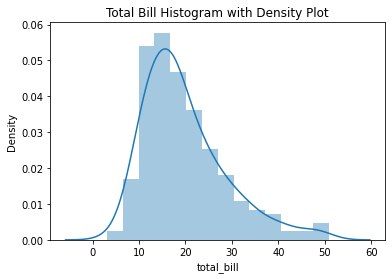

In [80]:
# 히스토그램 그리기

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

Text(0, 0.5, 'Frequency')

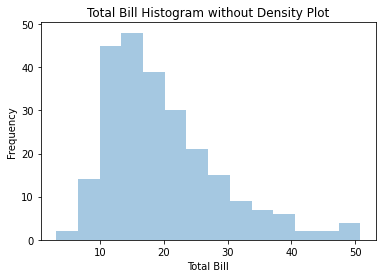

In [81]:
# 히스토그램만 그리기(밀집도 그래프 제외)

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram without Density Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Unit Probability')

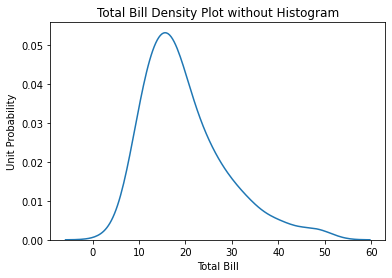

In [82]:
# 히스토그램 없이 밀집도 그래프만
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density Plot without Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

Text(0.5, 0, 'Total Bill')

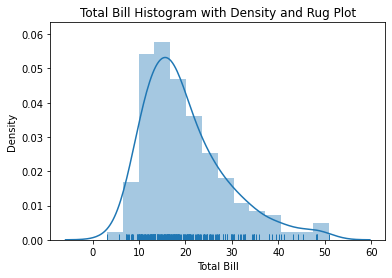

In [83]:
# 히스토그램 + 밀집도 + 양탄자(rug) 그래프
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

Text(0, 0.5, 'Frequency')

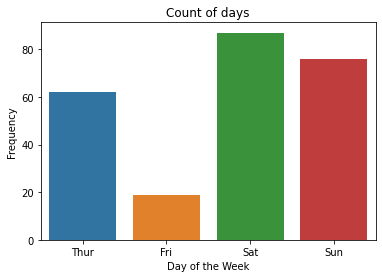

In [84]:
# count 그래프.
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### **<이변량 그래프>**

Text(0, 0.5, 'Tip')

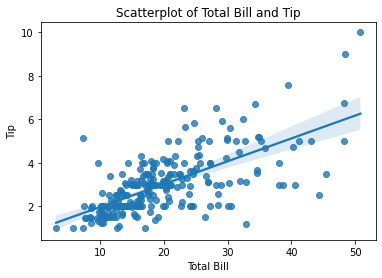

In [85]:
# seaborn 라이브러리로 산점도 그래프 그리기
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)  #regplot 이용 시 산점도 그래프와 회귀선 함께 그릴 수 있음
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

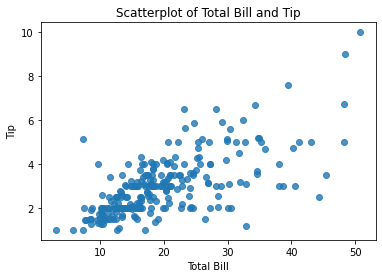

In [86]:
# 회귀선 없이 산점도만 그리기
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

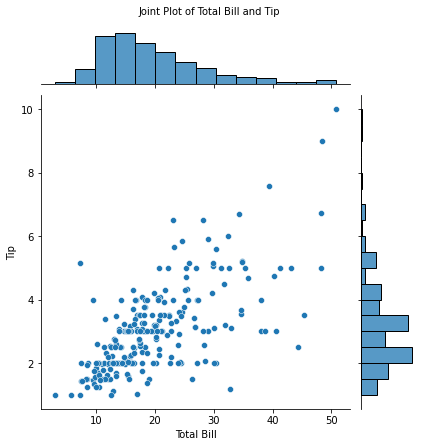

In [87]:
# 산점도 그래프와 히스토그램을 함께 그려주는 jointplot 메서드
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

* 육각 그래프(hexbin): 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프.
* 산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점 존재.

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

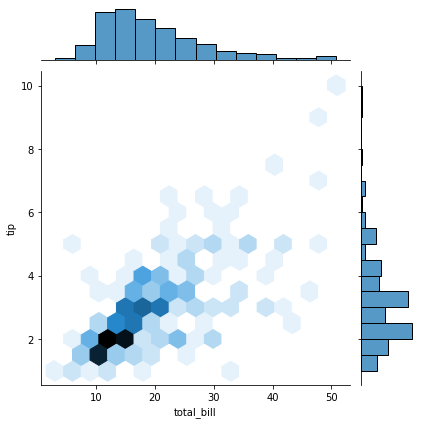

In [88]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

Text(0, 0.5, 'Tip')

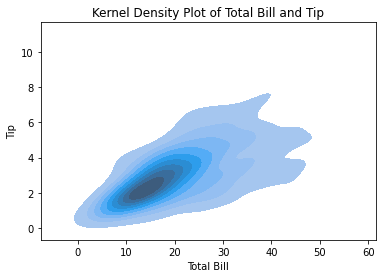

In [89]:
# 이차원 밀집도 그리기
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True)    # 음영 효과
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Average total bill')

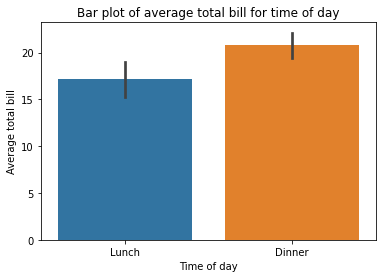

In [90]:
# 바 그래프 그리기 - 평균 계산
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Total Bill')

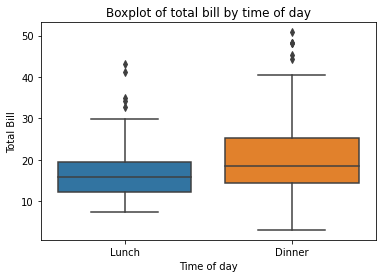

In [91]:
# 박스 그래프 그리기
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

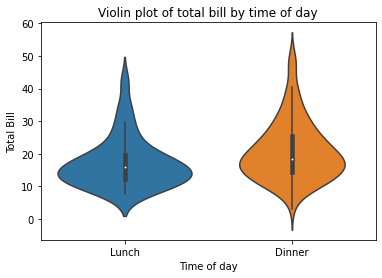

In [92]:
# 바이올린 그래프: 박스 그래프에 커널 밀도 추정. 데이터 분산 확인
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

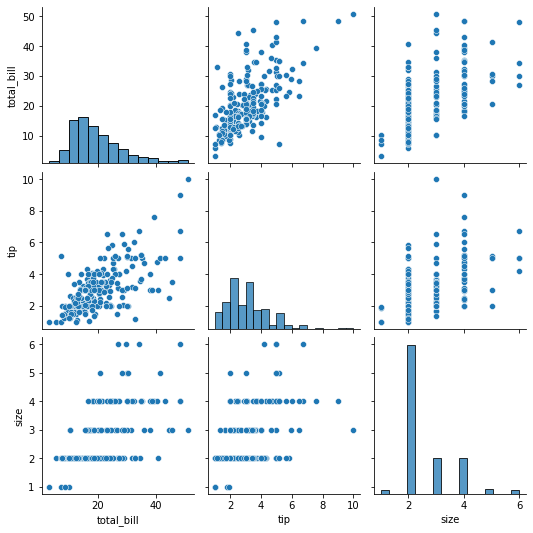

In [93]:
# 관계 그래프 그리기
fig = sns.pairplot(tips)

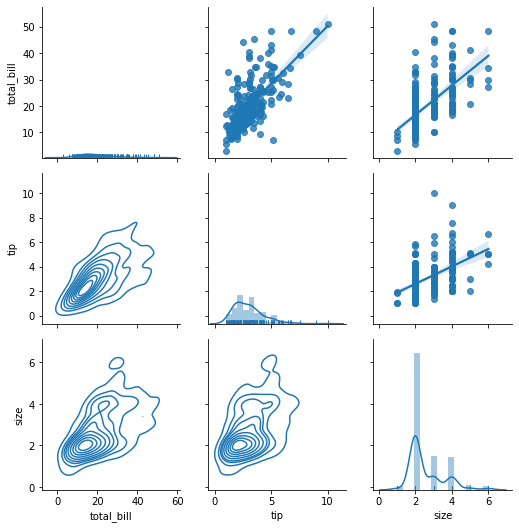

In [94]:
# 이차원 밀집도를 대각선 기준으로 아래쪽에, 산점도 그래프는 대각선 기준으로 위쪽에, 히스토그램과 밀집도는 대각선을 중심으로 그리기
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

### **<다변량 그래프>**

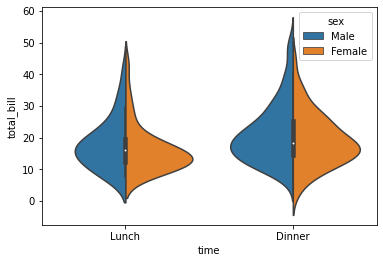

In [95]:
# seaborn 라이브러리로 바이올린 그래프 그리기 - 색상 추가
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

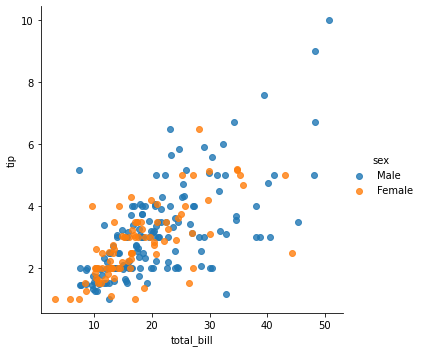

In [96]:
# 산점도, 관계 그래프 그리기 - 색상 추가
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

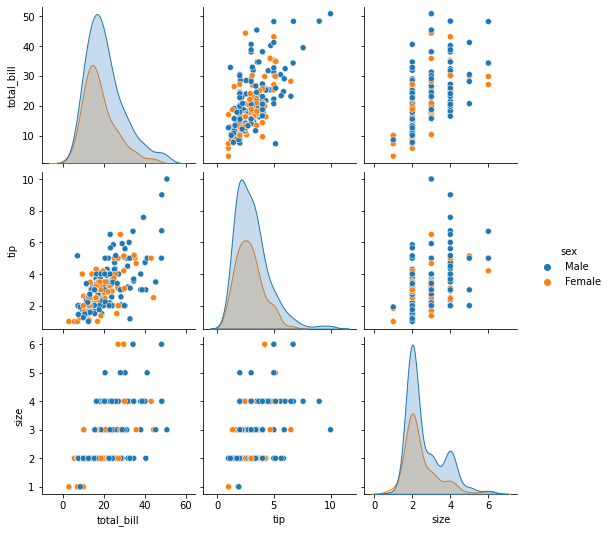

In [97]:
fig = sns.pairplot(tips, hue='sex')

ValueError: ignored

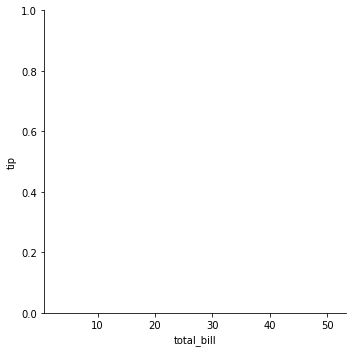

In [106]:
# 산점도 그래프의 크기와 모양 조절
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                     markers=['o', 'x'], scatter_kws = {'s': tips['size']*10})

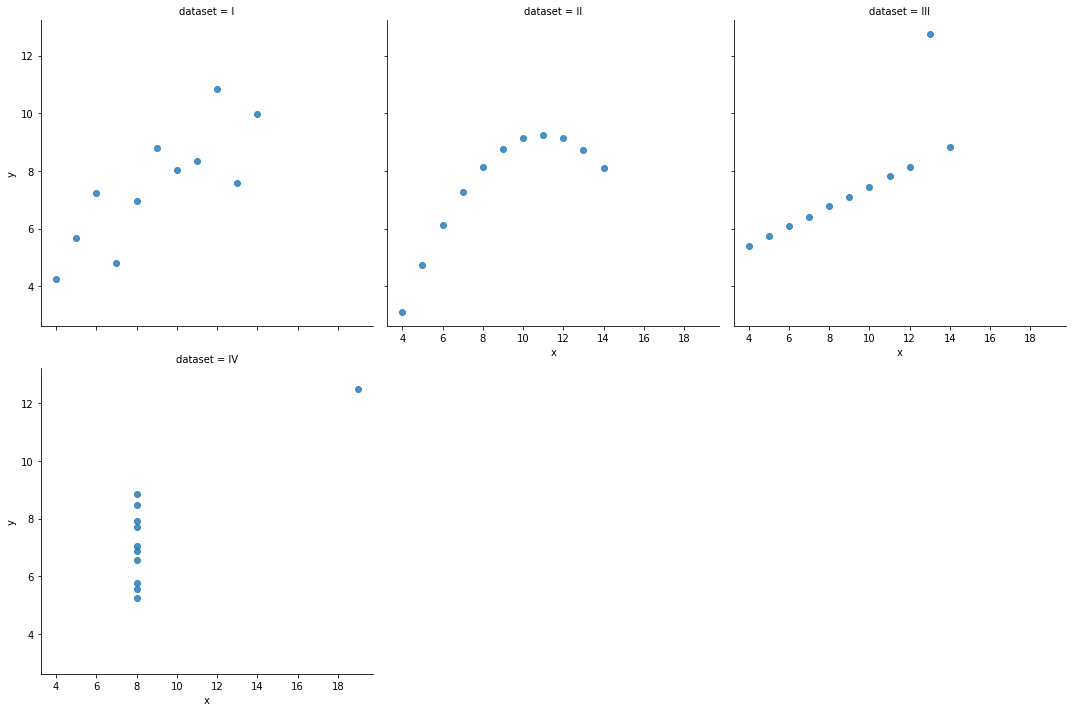

In [108]:
# lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=3)
# col_wrap: 그래프를 그릴 열의 최댓값.
# col: 데이터 그룹을 구분할 열(dataset) 지정.

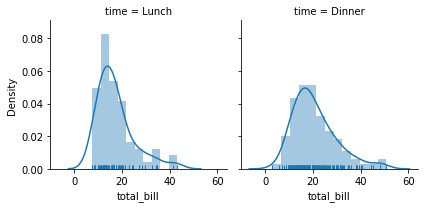

In [109]:
# FacetGrid
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

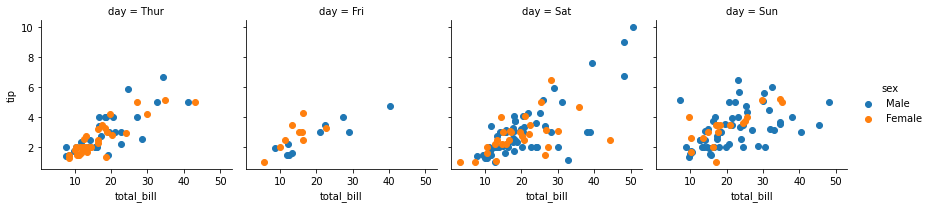

In [112]:
# FacetGrid를 이용한 다변량 그래프 그리기
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

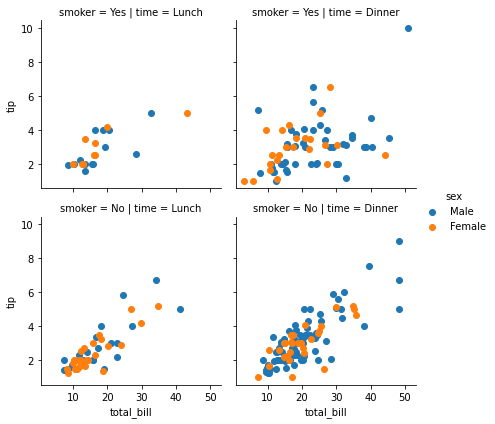

In [113]:
facet = sns.FacetGrid(tips, col='time', row = 'smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

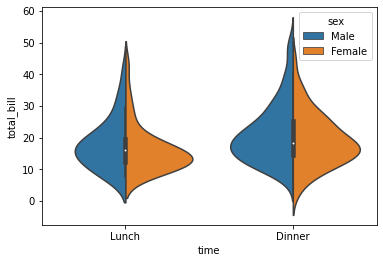

In [123]:
# 그래프에 스타일 적용하기 - set_style 적용 시 이후의 그래프가 모두 지정한 스타일로 바뀜
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

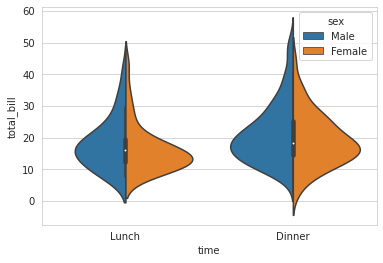

In [125]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

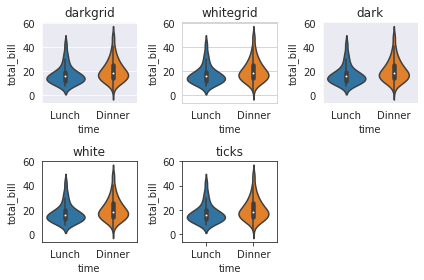

In [127]:
# for문으로 모든 스타일 하나씩 적용해보기
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
  plot_position = idx + 1
  with sns.axes_style(style):
    ax = fig.add_subplot(2, 3, plot_position)
    violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
    violin.set_title(style)

fig.tight_layout()

# **[Series와 DataFrame으로 그래프 그리기]**

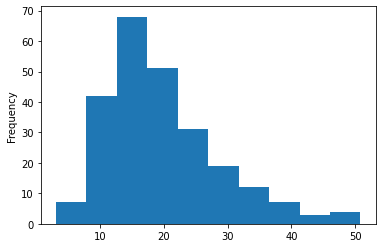

In [114]:
# 히스토그램 그리기
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

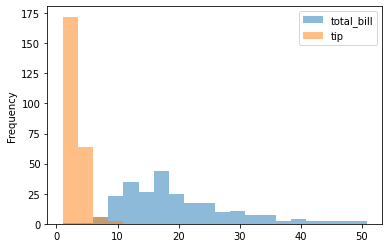

In [117]:
# tips 데이터프레임에서 2개의 시리즈를 선택해서 히스토그램 그리기
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

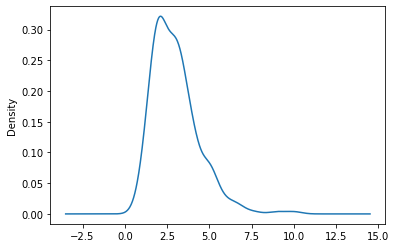

In [118]:
# 밀집도 그래프 그리기
ax = plt.subplots()
ax = tips['tip'].plot.kde()

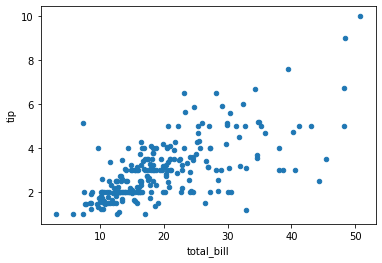

In [119]:
# 산점도 그래프 그리기
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

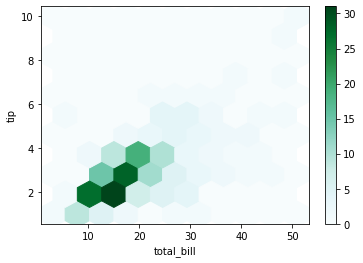

In [121]:
# 육각 그래프 그리기
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x = 'total_bill', y='tip', gridsize=10, ax=ax)

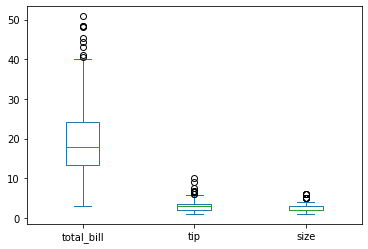

In [122]:
# 박스 그래프 그리기
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)